In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore")

Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [2]:
brent_data = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
brent_data.tail()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0
2019-09-01,58.84,2019,9,1,3,244,35,6,0,1,0


Text(0.5, 0, 't')

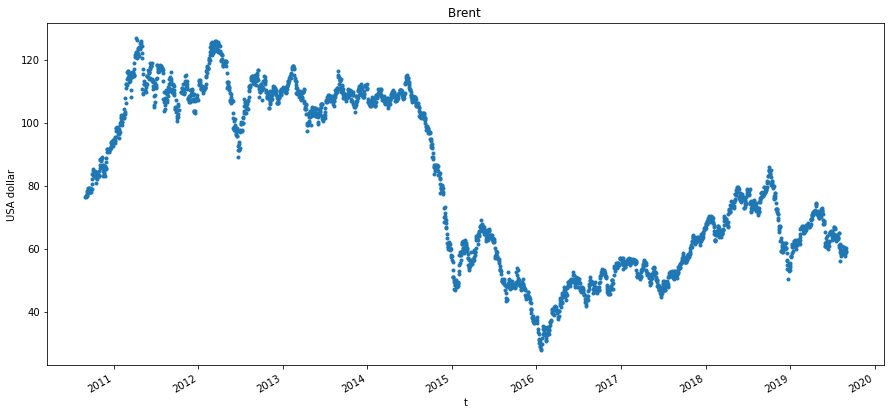

In [3]:
brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

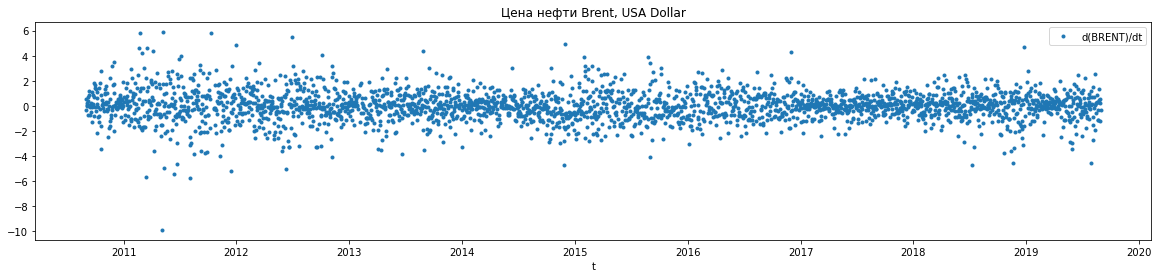

In [4]:
d_brent_data = brent_data['Значение'].values[1:]- brent_data['Значение'].values[:-1]

plt.figure(figsize=(20,4))
plt.plot(brent_data.iloc[:-1].index,d_brent_data,'.', label='d(BRENT)/dt')

plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

In [5]:
brent_data['diff1'] = 0
brent_data['diff1'].values[1:] = d_brent_data
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1
Дата,,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0,0


Добавьте первые разности по стоимости доллара и евро к рублю

In [6]:
rub_doll=pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_doll.rename(columns={'curs':'curs doll'},inplace=True)
rub_doll.head()

,curs doll
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [7]:
rub_e=pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e.drop(['nominal','cdx','data'], axis=1,inplace = True)
rub_e.rename(columns={'curs':'curs euro'},inplace=True)
rub_e.head()

,curs euro
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


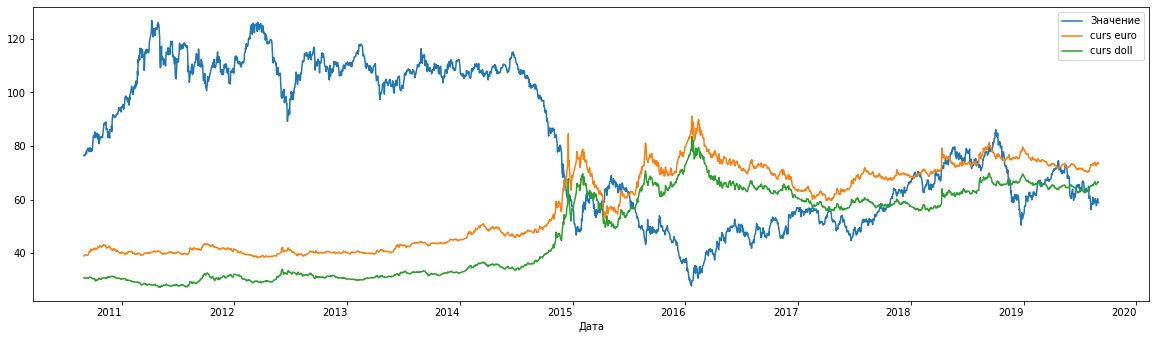

In [8]:
plt.figure(figsize=(20, 6))

brent_data['Значение'].plot()
rub_e['curs euro'].plot()
rub_doll['curs doll'].plot()

plt.legend()
plt.show()

In [9]:
brent_data = pd.concat([brent_data, rub_doll, rub_e], axis=1)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,curs doll,curs euro
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,0.0,30.8669,39.0127
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,0.0,30.8001,39.1654
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,0.0,30.6858,39.2901
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,0.0,30.6922,39.3505
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,0.0,NaN,NaN


In [10]:
np.sum(brent_data.isna())

Значение           470
year               470
month              470
dayofmonth         470
quarter            470
dayofyear          470
weekofyear         470
dayofweek          470
is_holiday         470
is_prev_holiday    470
is_next_holiday    470
diff1              470
curs doll          909
curs euro          909
dtype: int64

In [11]:
brent_data = brent_data[['Значение','diff1', 'curs doll','curs euro']]

In [12]:
np.sum(brent_data.isna())

Значение     470
diff1        470
curs doll    909
curs euro    909
dtype: int64

Будем заполнять последним известным значением все пропуски

In [13]:
brent_data['curs doll'].fillna(method='ffill', inplace=True)
brent_data['curs euro'].fillna(method='ffill', inplace=True)
brent_data['Значение'].fillna(method='ffill', inplace=True)
brent_data['diff1'].fillna(method='ffill', inplace=True)

In [14]:
brent_data['diff1_doll'] = brent_data['curs doll'].diff(1)
brent_data['diff1_euro'] = brent_data['curs euro'].diff(1)
brent_data.dropna(inplace=True) 

In [15]:
brent_data.head()

,Значение,diff1,curs doll,curs euro,diff1_doll,diff1_euro
2010-09-02,76.89,0.0,30.8001,39.1654,-0.0668,0.1527
2010-09-03,76.57,0.0,30.6858,39.2901,-0.1143,0.1247
2010-09-04,76.62,0.0,30.6922,39.3505,0.0064,0.0604
2010-09-05,76.63,0.0,30.6922,39.3505,0.0000,0.0000
2010-09-06,76.87,0.0,30.6922,39.3505,0.0000,0.0000


сделайте ее перрасчет (ресемплинг) в представление по неделям.

In [16]:
brent_data_w= brent_data.resample('W').mean()
brent_data_w.head()

,Значение,diff1,curs doll,curs euro,diff1_doll,diff1_euro
2010-09-05,76.677500,0.000000,30.717575,39.289125,-0.043675,0.084450
2010-09-12,77.673333,0.166667,30.777050,39.302883,0.033583,-0.026467
2010-09-19,78.590000,0.000000,30.887129,39.984557,0.026986,0.231400
2010-09-26,78.558571,0.000000,31.003800,41.040657,-0.019229,0.064057
2010-10-03,81.582857,0.571429,30.585086,41.382686,-0.062657,0.057243


In [17]:
np.sum(brent_data_w.isna())

Значение      0
diff1         0
curs doll     0
curs euro     0
diff1_doll    0
diff1_euro    0
dtype: int64

Постройте модель предсказания 1-й точки от текущей (h=1)

In [48]:
scl_target=StandardScaler() 

h=1
target = brent_data_w['Значение'].values[h:].reshape((brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(469, 1)

In [49]:
scl_x=StandardScaler() 

X = brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(469, 6)

In [51]:
def split_data_b(df, split_date):
    return df.loc[df.index.get_level_values(df.index.name) <= split_date].copy(), \
           df.loc[df.index.get_level_values(df.index.name) >  split_date].copy()

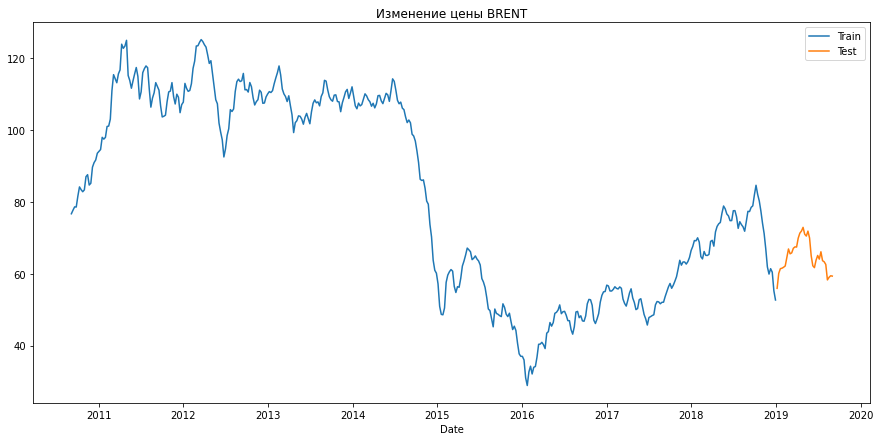

In [52]:
train, test = split_data_b(brent_data_w, '2019-01-01')

plt.figure( figsize=(15, 7))
plt.plot(train.index,train.iloc[:,0], label='Train' )
plt.plot(test.index,test.iloc[:,0], label='Test')
plt.xlabel('Date')
plt.title('Изменение цены BRENT')
plt.legend(loc='best')
plt.show()

In [53]:
X_train =X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [54]:
X_train.shape

(435, 6)

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [57]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
X_test.shape

(34, 6)

In [59]:
y_test_pred_g = model_g.predict(X_test)

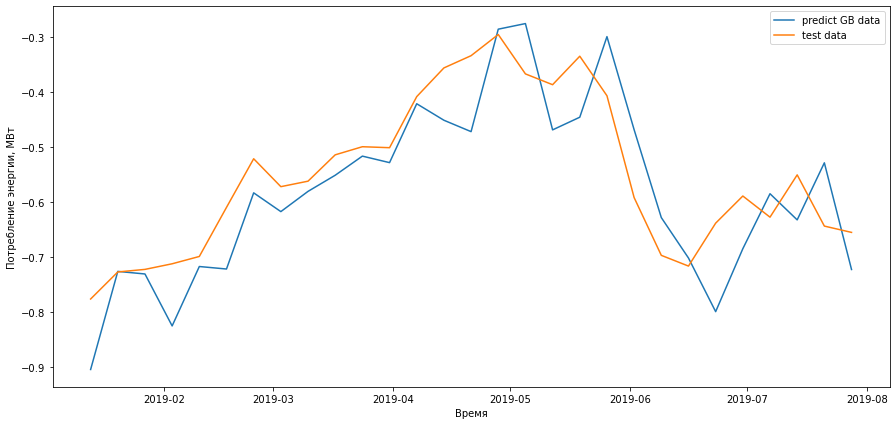

In [61]:
plt.figure( figsize=( 15, 7 ))

G = 5
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h:-G],y_test_pred_g[:-G], label='predict GB data' )
plt.plot(test.index[h:-G],y_test[:-G], label='test data')

plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [63]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.006453083038037523 
ошибка mae  :   0.06816722605035193 
оценка R2 :   0.7294225917796097


In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   2.789889081645062 %


In [66]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5,6,7,8,9,10], 
              "n_estimators":[100,200,300,400,500,600,700,800,900]}

#  randomized search
n_iter_search = 20

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.650 (std: 0.303)
Parameters: {'n_estimators': 400, 'max_depth': 8}

Model with rank: 2
Mean validation score: 0.640 (std: 0.317)
Parameters: {'n_estimators': 700, 'max_depth': 9}

Model with rank: 3
Mean validation score: 0.640 (std: 0.301)
Parameters: {'n_estimators': 900, 'max_depth': 8}



Выбираем модель с рангом 3. {'n_estimators':900, 'max_depth': 8} и проведем ее обучение на тренировочном наборе.

In [67]:
model_g_best = GradientBoostingRegressor(max_depth=8,  n_estimators=900)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                                      y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   3.370261764890508 %
